In [1]:
from LSTMBackbone import LSTMBackbone,DumbTokenizer,make_model_datasets_test
from Trainer import Trainer
import pandas as pd
import numpy as np
import torch
from torch import nn

In [2]:
device = 'cpu'
batch_size=16
SAVEPATH = "modelLSTMAttention.pth"

In [3]:
def get_datas(df):
    evidences =  np.concatenate([df['evidence_1'].values, df['evidence_2'].values],axis=0)
    procon1 = df['evidence_1_stance'].apply(lambda x: 0 if x=="CON" else 1)
    procon2 = df['evidence_2_stance'].apply(lambda x: 0 if x=="CON" else 1)
    procons = np.stack([procon1.values,procon2.values],axis=-1)
    topics = df['topic'].values
    targets = df['label'].values-1
    return topics, evidences, procons, targets

In [4]:
backbone = torch.load(SAVEPATH).to(device)

df = pd.read_csv('data/test.csv')
topics, evidences, procons, targets = get_datas(df)
evidences, topics = make_model_datasets_test(topics, evidences, device,'token_dictionary.pkl')

In [5]:
tokenizer = DumbTokenizer(device)
trainer = Trainer(backbone, tokenizer, topics, evidences, procons, targets, 
    device=device, batch_size=batch_size, shuffle=False, valsize=0)
print("Model and data loaded! Beginning testing")

Model and data loaded! Beginning testing


In [6]:
acc, w_list = trainer.evaluate()
print(acc)

2it [00:00,  7.31it/s]

torch.Size([16, 7, 46]) torch.Size([16, 7, 49])
torch.Size([16, 8, 50]) torch.Size([16, 8, 50])


4it [00:00,  9.09it/s]

torch.Size([16, 11, 41]) torch.Size([16, 11, 46])
torch.Size([16, 11, 50]) torch.Size([16, 11, 50])
torch.Size([16, 7, 50]) torch.Size([16, 7, 50])


8it [00:00, 10.46it/s]

torch.Size([16, 8, 49]) torch.Size([16, 8, 50])
torch.Size([16, 11, 50]) torch.Size([16, 11, 46])
torch.Size([16, 11, 48]) torch.Size([16, 11, 41])


10it [00:00, 11.44it/s]

torch.Size([16, 11, 46]) torch.Size([16, 11, 45])
torch.Size([16, 7, 43]) torch.Size([16, 7, 44])
torch.Size([16, 7, 44]) torch.Size([16, 7, 41])


14it [00:01, 11.18it/s]

torch.Size([16, 11, 50]) torch.Size([16, 11, 49])
torch.Size([16, 7, 40]) torch.Size([16, 7, 42])
torch.Size([16, 11, 39]) torch.Size([16, 11, 39])


16it [00:01, 11.83it/s]

torch.Size([16, 11, 44]) torch.Size([16, 11, 37])
torch.Size([16, 11, 44]) torch.Size([16, 11, 41])
torch.Size([16, 11, 42]) torch.Size([16, 11, 50])


20it [00:01, 11.98it/s]

torch.Size([16, 11, 40]) torch.Size([16, 11, 39])
torch.Size([16, 11, 42]) torch.Size([16, 11, 45])
torch.Size([16, 11, 47]) torch.Size([16, 11, 49])


22it [00:01, 12.20it/s]

torch.Size([16, 11, 43]) torch.Size([16, 11, 45])
torch.Size([16, 11, 44]) torch.Size([16, 11, 41])
torch.Size([16, 11, 39]) torch.Size([16, 11, 44])


26it [00:02, 13.00it/s]

torch.Size([16, 11, 41]) torch.Size([16, 11, 50])
torch.Size([16, 11, 40]) torch.Size([16, 11, 33])
torch.Size([16, 11, 40]) torch.Size([16, 11, 41])


30it [00:02, 14.27it/s]

torch.Size([16, 11, 44]) torch.Size([16, 11, 43])
torch.Size([16, 7, 41]) torch.Size([16, 7, 50])
torch.Size([16, 11, 39]) torch.Size([16, 11, 43])
torch.Size([16, 11, 50]) torch.Size([16, 11, 49])


34it [00:02, 14.88it/s]

torch.Size([16, 11, 40]) torch.Size([16, 11, 41])
torch.Size([16, 11, 41]) torch.Size([16, 11, 41])
torch.Size([16, 11, 44]) torch.Size([16, 11, 34])
torch.Size([16, 11, 41]) torch.Size([16, 11, 35])


36it [00:02, 14.43it/s]

torch.Size([16, 11, 41]) torch.Size([16, 11, 50])
torch.Size([16, 11, 41]) torch.Size([16, 11, 36])
torch.Size([16, 11, 42]) torch.Size([16, 11, 49])


40it [00:03, 14.09it/s]

torch.Size([16, 11, 41]) torch.Size([16, 11, 46])
torch.Size([16, 11, 49]) torch.Size([16, 11, 43])
torch.Size([16, 7, 41]) torch.Size([16, 7, 50])


44it [00:03, 14.37it/s]

torch.Size([16, 11, 50]) torch.Size([16, 11, 50])
torch.Size([16, 11, 42]) torch.Size([16, 11, 50])
torch.Size([16, 11, 50]) torch.Size([16, 11, 49])
torch.Size([16, 7, 41]) torch.Size([16, 7, 42])


46it [00:03, 14.39it/s]

torch.Size([16, 11, 47]) torch.Size([16, 11, 49])
torch.Size([16, 6, 40]) torch.Size([16, 6, 41])
torch.Size([16, 7, 46]) torch.Size([16, 7, 50])


50it [00:03, 13.88it/s]

torch.Size([16, 11, 44]) torch.Size([16, 11, 48])
torch.Size([16, 11, 47]) torch.Size([16, 11, 50])
torch.Size([16, 11, 44]) torch.Size([16, 11, 44])


52it [00:04,  9.69it/s]

torch.Size([16, 11, 44]) torch.Size([16, 11, 41])
torch.Size([16, 11, 40]) torch.Size([16, 11, 39])
torch.Size([16, 7, 41]) torch.Size([16, 7, 35])


56it [00:04, 11.44it/s]

torch.Size([16, 11, 44]) torch.Size([16, 11, 42])
torch.Size([16, 11, 44]) torch.Size([16, 11, 48])
torch.Size([16, 11, 46]) torch.Size([16, 11, 40])


58it [00:04, 12.05it/s]

torch.Size([16, 11, 38]) torch.Size([16, 11, 37])
torch.Size([16, 11, 49]) torch.Size([16, 11, 49])
torch.Size([16, 11, 41]) torch.Size([16, 11, 39])


62it [00:05, 11.89it/s]

torch.Size([16, 11, 47]) torch.Size([16, 11, 44])
torch.Size([16, 11, 44]) torch.Size([16, 11, 50])
torch.Size([16, 11, 44]) torch.Size([16, 11, 49])


64it [00:05, 12.57it/s]

torch.Size([16, 7, 44]) torch.Size([16, 7, 38])
torch.Size([16, 11, 42]) torch.Size([16, 11, 39])
torch.Size([16, 11, 50]) torch.Size([16, 11, 50])


68it [00:05, 12.96it/s]

torch.Size([16, 7, 44]) torch.Size([16, 7, 50])
torch.Size([16, 11, 39]) torch.Size([16, 11, 37])
torch.Size([16, 11, 44]) torch.Size([16, 11, 41])


70it [00:05, 12.75it/s]

torch.Size([16, 11, 46]) torch.Size([16, 11, 41])
torch.Size([16, 11, 44]) torch.Size([16, 11, 49])
torch.Size([16, 11, 49]) torch.Size([16, 11, 44])


74it [00:05, 14.13it/s]

torch.Size([16, 11, 50]) torch.Size([16, 11, 48])
torch.Size([16, 11, 36]) torch.Size([16, 11, 42])
torch.Size([16, 11, 36]) torch.Size([16, 11, 45])
torch.Size([16, 11, 37]) torch.Size([16, 11, 42])


76it [00:06, 14.63it/s]

torch.Size([16, 11, 50]) torch.Size([16, 11, 44])
torch.Size([16, 11, 47]) torch.Size([16, 11, 48])


78it [00:06, 12.07it/s]

torch.Size([16, 11, 44]) torch.Size([16, 11, 50])
torch.Size([16, 11, 44]) torch.Size([16, 11, 49])


82it [00:06, 10.94it/s]

torch.Size([16, 11, 36]) torch.Size([16, 11, 41])
torch.Size([16, 11, 49]) torch.Size([16, 11, 50])
torch.Size([16, 11, 41]) torch.Size([16, 11, 41])


84it [00:06, 11.47it/s]

torch.Size([16, 11, 41]) torch.Size([16, 11, 43])
torch.Size([16, 11, 48]) torch.Size([16, 11, 42])
torch.Size([16, 11, 40]) torch.Size([16, 11, 38])


87it [00:07, 11.94it/s]

torch.Size([16, 11, 38]) torch.Size([16, 11, 36])
torch.Size([2, 11, 44]) torch.Size([2, 11, 44])
1378
87
0.6407837445573294


In [21]:
top, evi, _, _ = get_datas(df)

In [39]:
w1, w2 = w_list[0]
print(w1[0,:,:].shape)
print(w2[0,:,:].shape)

w1[0,:,22:46]

torch.Size([7, 46])
torch.Size([7, 49])


tensor([[0.0096, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
         0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
         0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062],
        [0.0209, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
         0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
         0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171],
        [0.0224, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148,
         0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148,
         0.0148, 0.0148, 0.0148, 0.0148, 0.0148, 0.0148],
        [0.0275, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262,
         0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262,
         0.0262, 0.0262, 0.0262, 0.0262, 0.0262, 0.0262],
        [0.0213, 0.0121, 0.0121, 0.0121, 0.0121, 0.0121, 0.0121, 0.0121, 0.0121,
         0.0121, 0.0121, 0.0121, 0.0121

In [40]:
top[44]

'We should ban the sale of violent video games to minors'

In [57]:
pro1 = evi[44]
len(pro1.split(' '))

27

In [67]:
pro2 = evi[1378 + 44]
len(pro2.split(' '))

24

In [72]:
w1, w2 = w_list[2]
# print(w1[11,:,26:])
print(w2[11,:,21:])

tensor([[0.0141, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144,
         0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144,
         0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144, 0.0144],
        [0.0001, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053,
         0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053,
         0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053, 0.0053],
        [0.0004, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066,
         0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066,
         0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066],
        [0.0002, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074,
         0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074,
         0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074, 0.0074],
        [0.0030, 0.0119, 0.0119, 0.0119, 0.0119, 0.0119, 0.0119, 0.0119, 0.0119,
       

In [79]:
print(len(evi[1378].split(' ')))
w2[0:,:,44:]

23


tensor([[[0.0326, 0.0326],
         [0.0224, 0.0224],
         [0.0291, 0.0291],
         [0.0292, 0.0292],
         [0.0258, 0.0258],
         [0.0258, 0.0258],
         [0.0258, 0.0258],
         [0.0258, 0.0258],
         [0.0258, 0.0258],
         [0.0258, 0.0258],
         [0.0258, 0.0258]],

        [[0.0191, 0.0191],
         [0.0061, 0.0061],
         [0.0093, 0.0093],
         [0.0087, 0.0087],
         [0.0145, 0.0145],
         [0.0145, 0.0145],
         [0.0145, 0.0145],
         [0.0145, 0.0145],
         [0.0145, 0.0145],
         [0.0145, 0.0145],
         [0.0145, 0.0145]],

        [[0.0086, 0.0086],
         [0.0023, 0.0023],
         [0.0034, 0.0034],
         [0.0030, 0.0030],
         [0.0078, 0.0078],
         [0.0108, 0.0108],
         [0.0183, 0.0183],
         [0.0194, 0.0194],
         [0.0163, 0.0163],
         [0.0113, 0.0113],
         [0.0132, 0.0132]],

        [[0.0227, 0.0227],
         [0.0134, 0.0134],
         [0.0177, 0.0177],
         [0.0181, 0.01

In [113]:
att = w1[11,:len(pro1.split(' ')), :len(pro1.split(' '))]
# att = w1[11]

In [99]:
import matplotlib.pyplot as plt

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

In [115]:
t_words = top[44].split(' ')
p_words = pro1.split(' ')

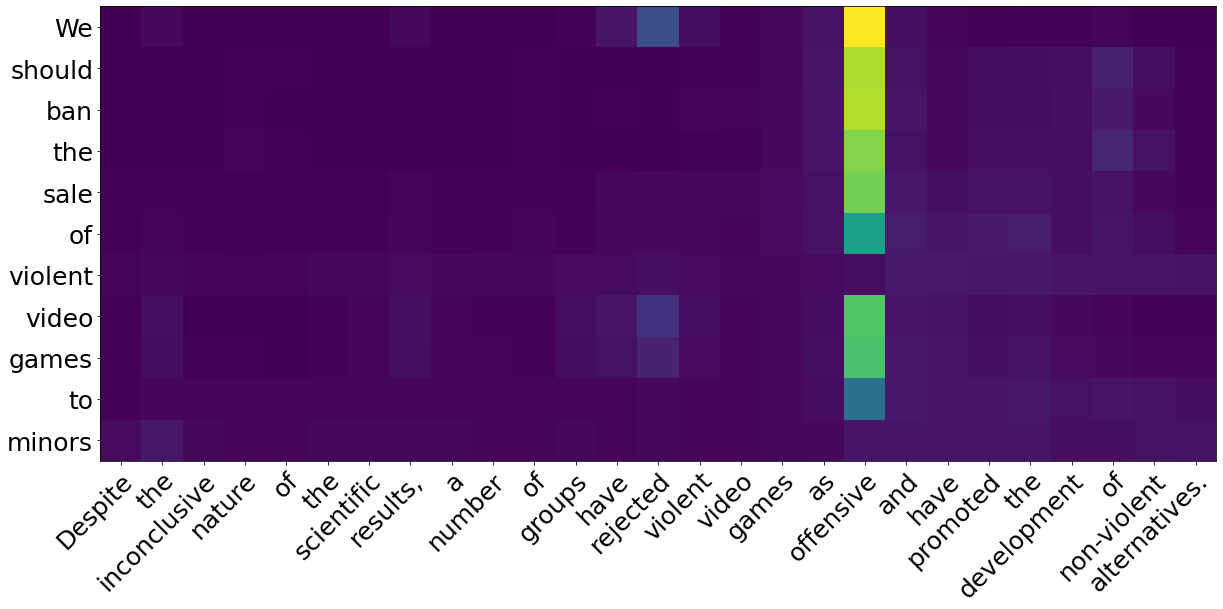

In [116]:
fig, axes = plt.subplots(figsize=(20, 20))
axes.imshow(att.detach().cpu().numpy())
axes.set_yticks(np.arange(len(t_words)))
axes.set_yticklabels(t_words, fontsize=25)
axes.set_xticks(np.arange(len(p_words)))
axes.set_xticklabels(p_words, fontsize=25)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")
plt.show()

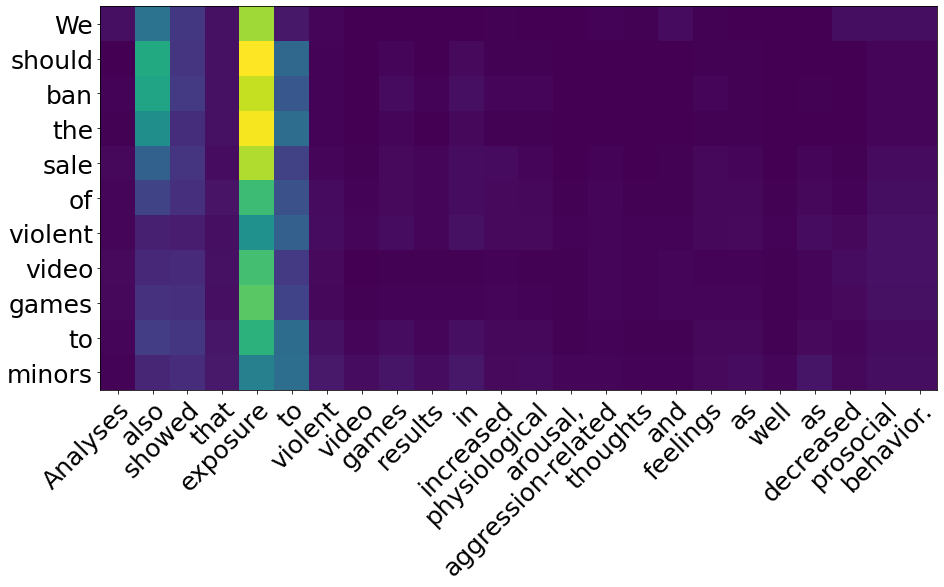

In [117]:
att = w2[11,:len(pro2.split(' ')), :len(pro2.split(' '))]
# att = w2[11,:,:]
t_words = top[44].split(' ')
p_words = pro2.split(' ')
fig, axes = plt.subplots(figsize=(15, 15))
axes.imshow(att.detach().cpu().numpy())
axes.set_yticks(np.arange(len(t_words)))
axes.set_yticklabels(t_words, fontsize=25)
axes.set_xticks(np.arange(len(p_words)))
axes.set_xticklabels(p_words, fontsize=25)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")
plt.show()

In [102]:
import numpy as np

latex_special_token = ["!@#$%^&*()"]

def generate(text_list, attention_list, latex_file, color='red', rescale_value = False):
	assert(len(text_list) == len(attention_list))
	if rescale_value:
		attention_list = rescale(attention_list)
	word_num = len(text_list)
	text_list = clean_word(text_list)
	with open(latex_file,'w') as f:
		f.write(r'''\documentclass[varwidth]{standalone}
\special{papersize=210mm,297mm}
\usepackage{color}
\usepackage{tcolorbox}
\usepackage{CJK}
\usepackage{adjustbox}
\tcbset{width=0.9\textwidth,boxrule=0pt,colback=red,arc=0pt,auto outer arc,left=0pt,right=0pt,boxsep=5pt}
\begin{document}
\begin{CJK*}{UTF8}{gbsn}'''+'\n')
		string = r'''{\setlength{\fboxsep}{0pt}\colorbox{white!0}{\parbox{0.9\textwidth}{'''+"\n"
		for idx in range(word_num):
			string += "\\colorbox{%s!%s}{"%(color, attention_list[idx])+"\\strut " + text_list[idx]+"} "
		string += "\n}}}"
		f.write(string+'\n')
		f.write(r'''\end{CJK*}
\end{document}''')

def rescale(input_list):
	the_array = np.asarray(input_list)
	the_max = np.max(the_array)
	the_min = np.min(the_array)
	rescale = (the_array - the_min)/(the_max-the_min)*100
	return rescale.tolist()


def clean_word(word_list):
	new_word_list = []
	for word in word_list:
		for latex_sensitive in ["\\", "%", "&", "^", "#", "_",  "{", "}"]:
			if latex_sensitive in word:
				word = word.replace(latex_sensitive, '\\'+latex_sensitive)
		new_word_list.append(word)
	return new_word_list

In [74]:
def get_datas(df):
    evidences =  np.concatenate([df['evidence_1'].values, df['evidence_2'].values],axis=0)
    procon1 = df['evidence_1_stance'].apply(lambda x: 0 if x=="CON" else 1)
    procon2 = df['evidence_2_stance'].apply(lambda x: 0 if x=="CON" else 1)
    procons = np.stack([procon1.values,procon2.values],axis=-1)
    topics = df['topic'].values
    targets = df['label'].values - 1  # 0: the first evidence; 1: the second evidence
    return topics, evidences, procons, targets

In [39]:
backbone = torch.load(SAVEPATH)
tokenizer = DumbTokenizer(device)
backbone.eval()

LSTMBackbone(
  (emb_layer): Embedding(6979, 50, padding_idx=6978)
  (lstm_ev): LSTM(50, 128, batch_first=True, bidirectional=True)
  (lstm_top): LSTM(50, 128, batch_first=True, bidirectional=True)
  (attention_layer): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
  )
  (attention_layer2): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
  )
  (keyW): Linear(in_features=256, out_features=128, bias=True)
  (valueW): Linear(in_features=256, out_features=128, bias=True)
  (queryW): Linear(in_features=256, out_features=128, bias=True)
  (keyW2): Linear(in_features=128, out_features=128, bias=True)
  (valueW2): Linear(in_features=128, out_features=128, bias=True)
  (queryW2): Linear(in_features=128, out_features=128, bias=True)
  (output_hidden): Linear(in_features=128, out_features=128, bias=True)
  (output_fc): Linear(in_features=128, out_features=1, bias=Tr

In [69]:
df = pd.read_csv('data/test.csv')
e = np.concatenate((df['evidence_1'].values, df['evidence_2'].values),axis=0)
e = np.stack((df['evidence_1'].values, df['evidence_2'].values), axis=-1)
e[:1]

array([['Vorilhon told lawmakers that banning the development of human cloning was comparable to outlawing medical advances such "antibiotics, blood transfusions, and vaccines."[REF] .',
        'Biden supports federal funding for embryonic stem cell research and voted to expand development and voted against a 1998 ban on human cloning.']],
      dtype=object)

In [56]:
topics, evidences, procons, targets = get_datas(df)

In [57]:
ev, top = make_model_datasets_test(topics[:1], evidences[:2], device, 
    'token_dictionary.pkl')

In [35]:
evidences.shape
print(evidences[:3])
print(topics[:1])

['Vorilhon told lawmakers that banning the development of human cloning was comparable to outlawing medical advances such "antibiotics, blood transfusions, and vaccines."[REF] .'
 'Costa Rica proposed the adoption of an international convention to ban all forms of human cloning.'
 'Critics argue that the so-called free market reform policies - which the Bank advocates in many cases - in practice are often harmful to economic development if implemented badly, too quickly ("shock therapy"), in the wrong sequence, or in very weak, uncompetitive economies [REF].']
['We should ban human cloning']


In [ ]:
ev_to_topic = {}
for i in range(0, len(evidences[:,0])):
    ev_to_topic[evidences[i,0]] = (topics[i], procons[i][0])